In [117]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.feature_selection import SelectFromModel
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [54]:
# Load the dataset
df = pd.read_csv('/Users/vidhyakshayakannan/Documents/NHANES Age Prediction/dataset/NHANES_age_prediction.csv')

In [55]:
# Print the shape of the dataset
df.shape

(2278, 10)

In [56]:
# Display the first few rows of the dataset
print(df.head())

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010   
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0  \
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [57]:
# Display the summary statistics of the dataset
print(df.describe().T)

           count          mean          std       min       25%       50%   
SEQN      2278.0  78691.853819  2921.365151  73564.00  76171.75  78749.00  \
RIDAGEYR  2278.0     41.795874    20.156111     12.00     24.00     41.00   
RIAGENDR  2278.0      1.511414     0.499979      1.00      1.00      2.00   
PAQ605    2278.0      1.822651     0.398918      1.00      2.00      2.00   
BMXBMI    2278.0     27.955180     7.248962     14.50     22.80     26.80   
LBXGLU    2278.0     99.553117    17.889834     63.00     91.00     97.00   
DIQ010    2278.0      2.016242     0.185556      1.00      2.00      2.00   
LBXGLT    2278.0    114.978929    47.061239     40.00     87.00    105.00   
LBXIN     2278.0     11.834794     9.718812      0.14      5.86      9.04   

               75%       max  
SEQN      81213.50  83727.00  
RIDAGEYR     58.00     80.00  
RIAGENDR      2.00      2.00  
PAQ605        2.00      7.00  
BMXBMI       31.20     70.10  
LBXGLU      104.00    405.00  
DIQ010      

In [58]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


In [59]:
# Check for missing values
print(df.isnull().sum())

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


In [60]:
if (df.duplicated().values.any() == True):
  dup = df[df.duplicated()].shape[0]
  print(f"This dataset has {dup} duplicated rows")
  data = df.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset.")

else:
  print("Dataset has no duplicated rows.")

Dataset has no duplicated rows.


In [61]:
# Encode the target variable
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

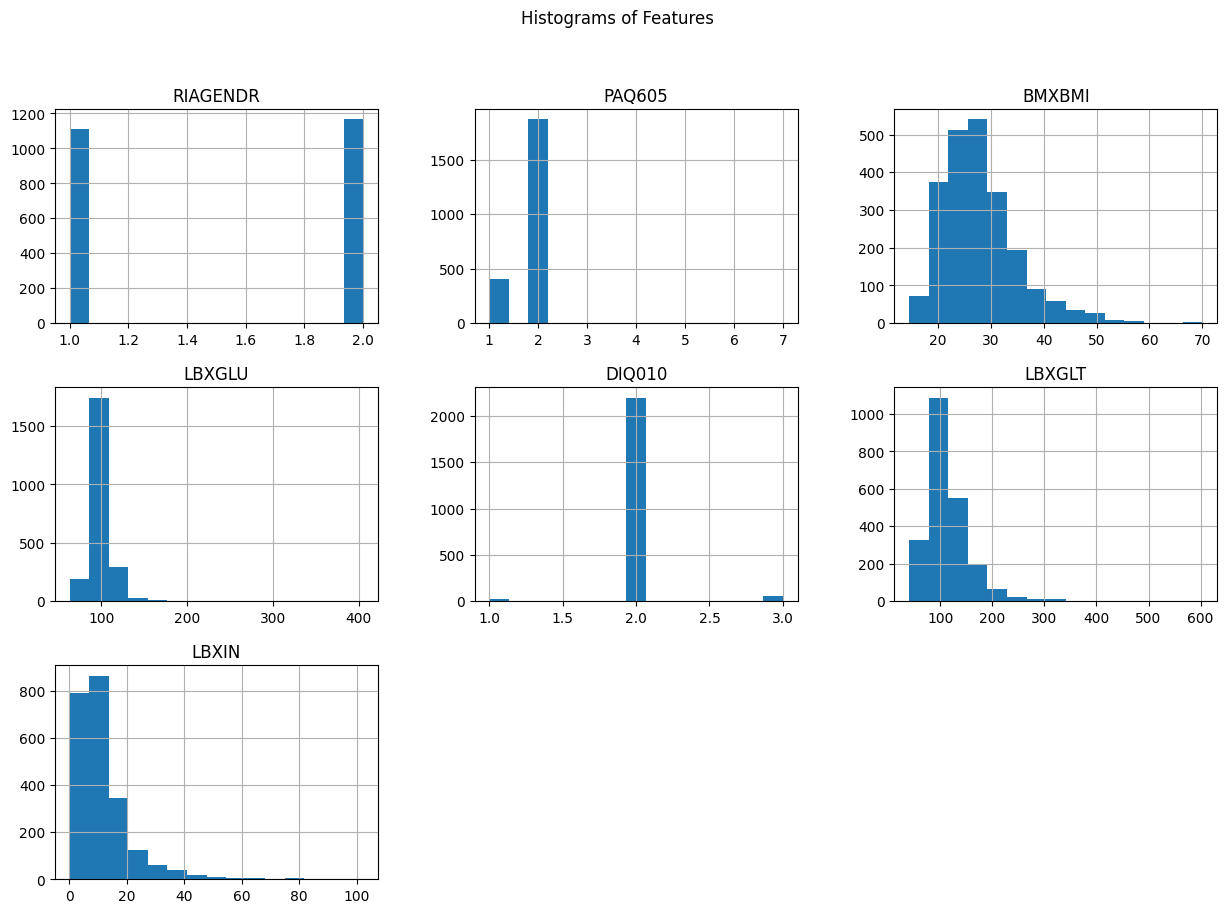

In [62]:
# Plot histograms for each feature
X = df.drop(['age_group', 'SEQN', 'RIDAGEYR'], axis=1)
X.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Features")
plt.show()

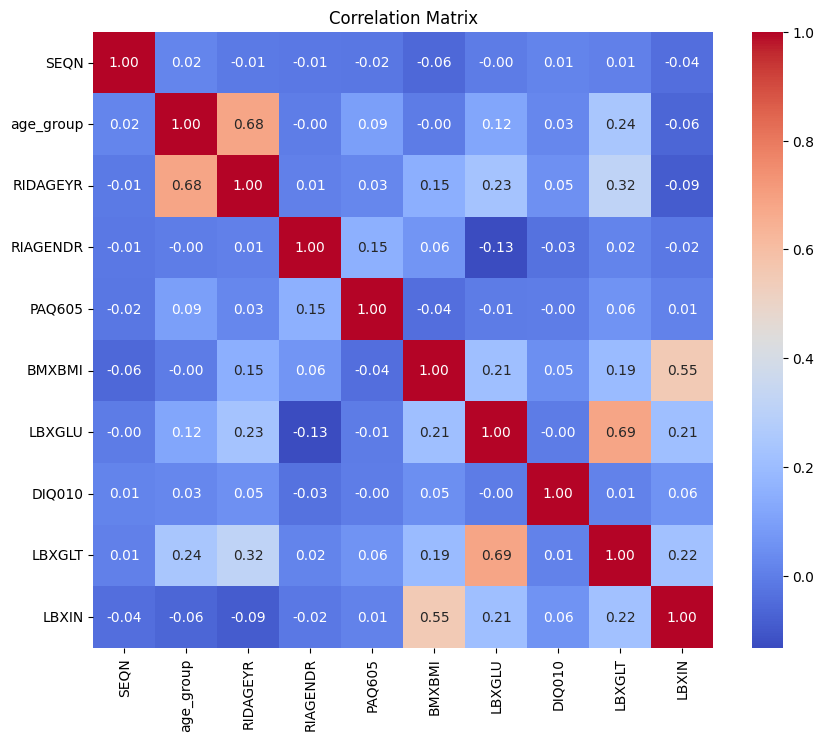

In [63]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


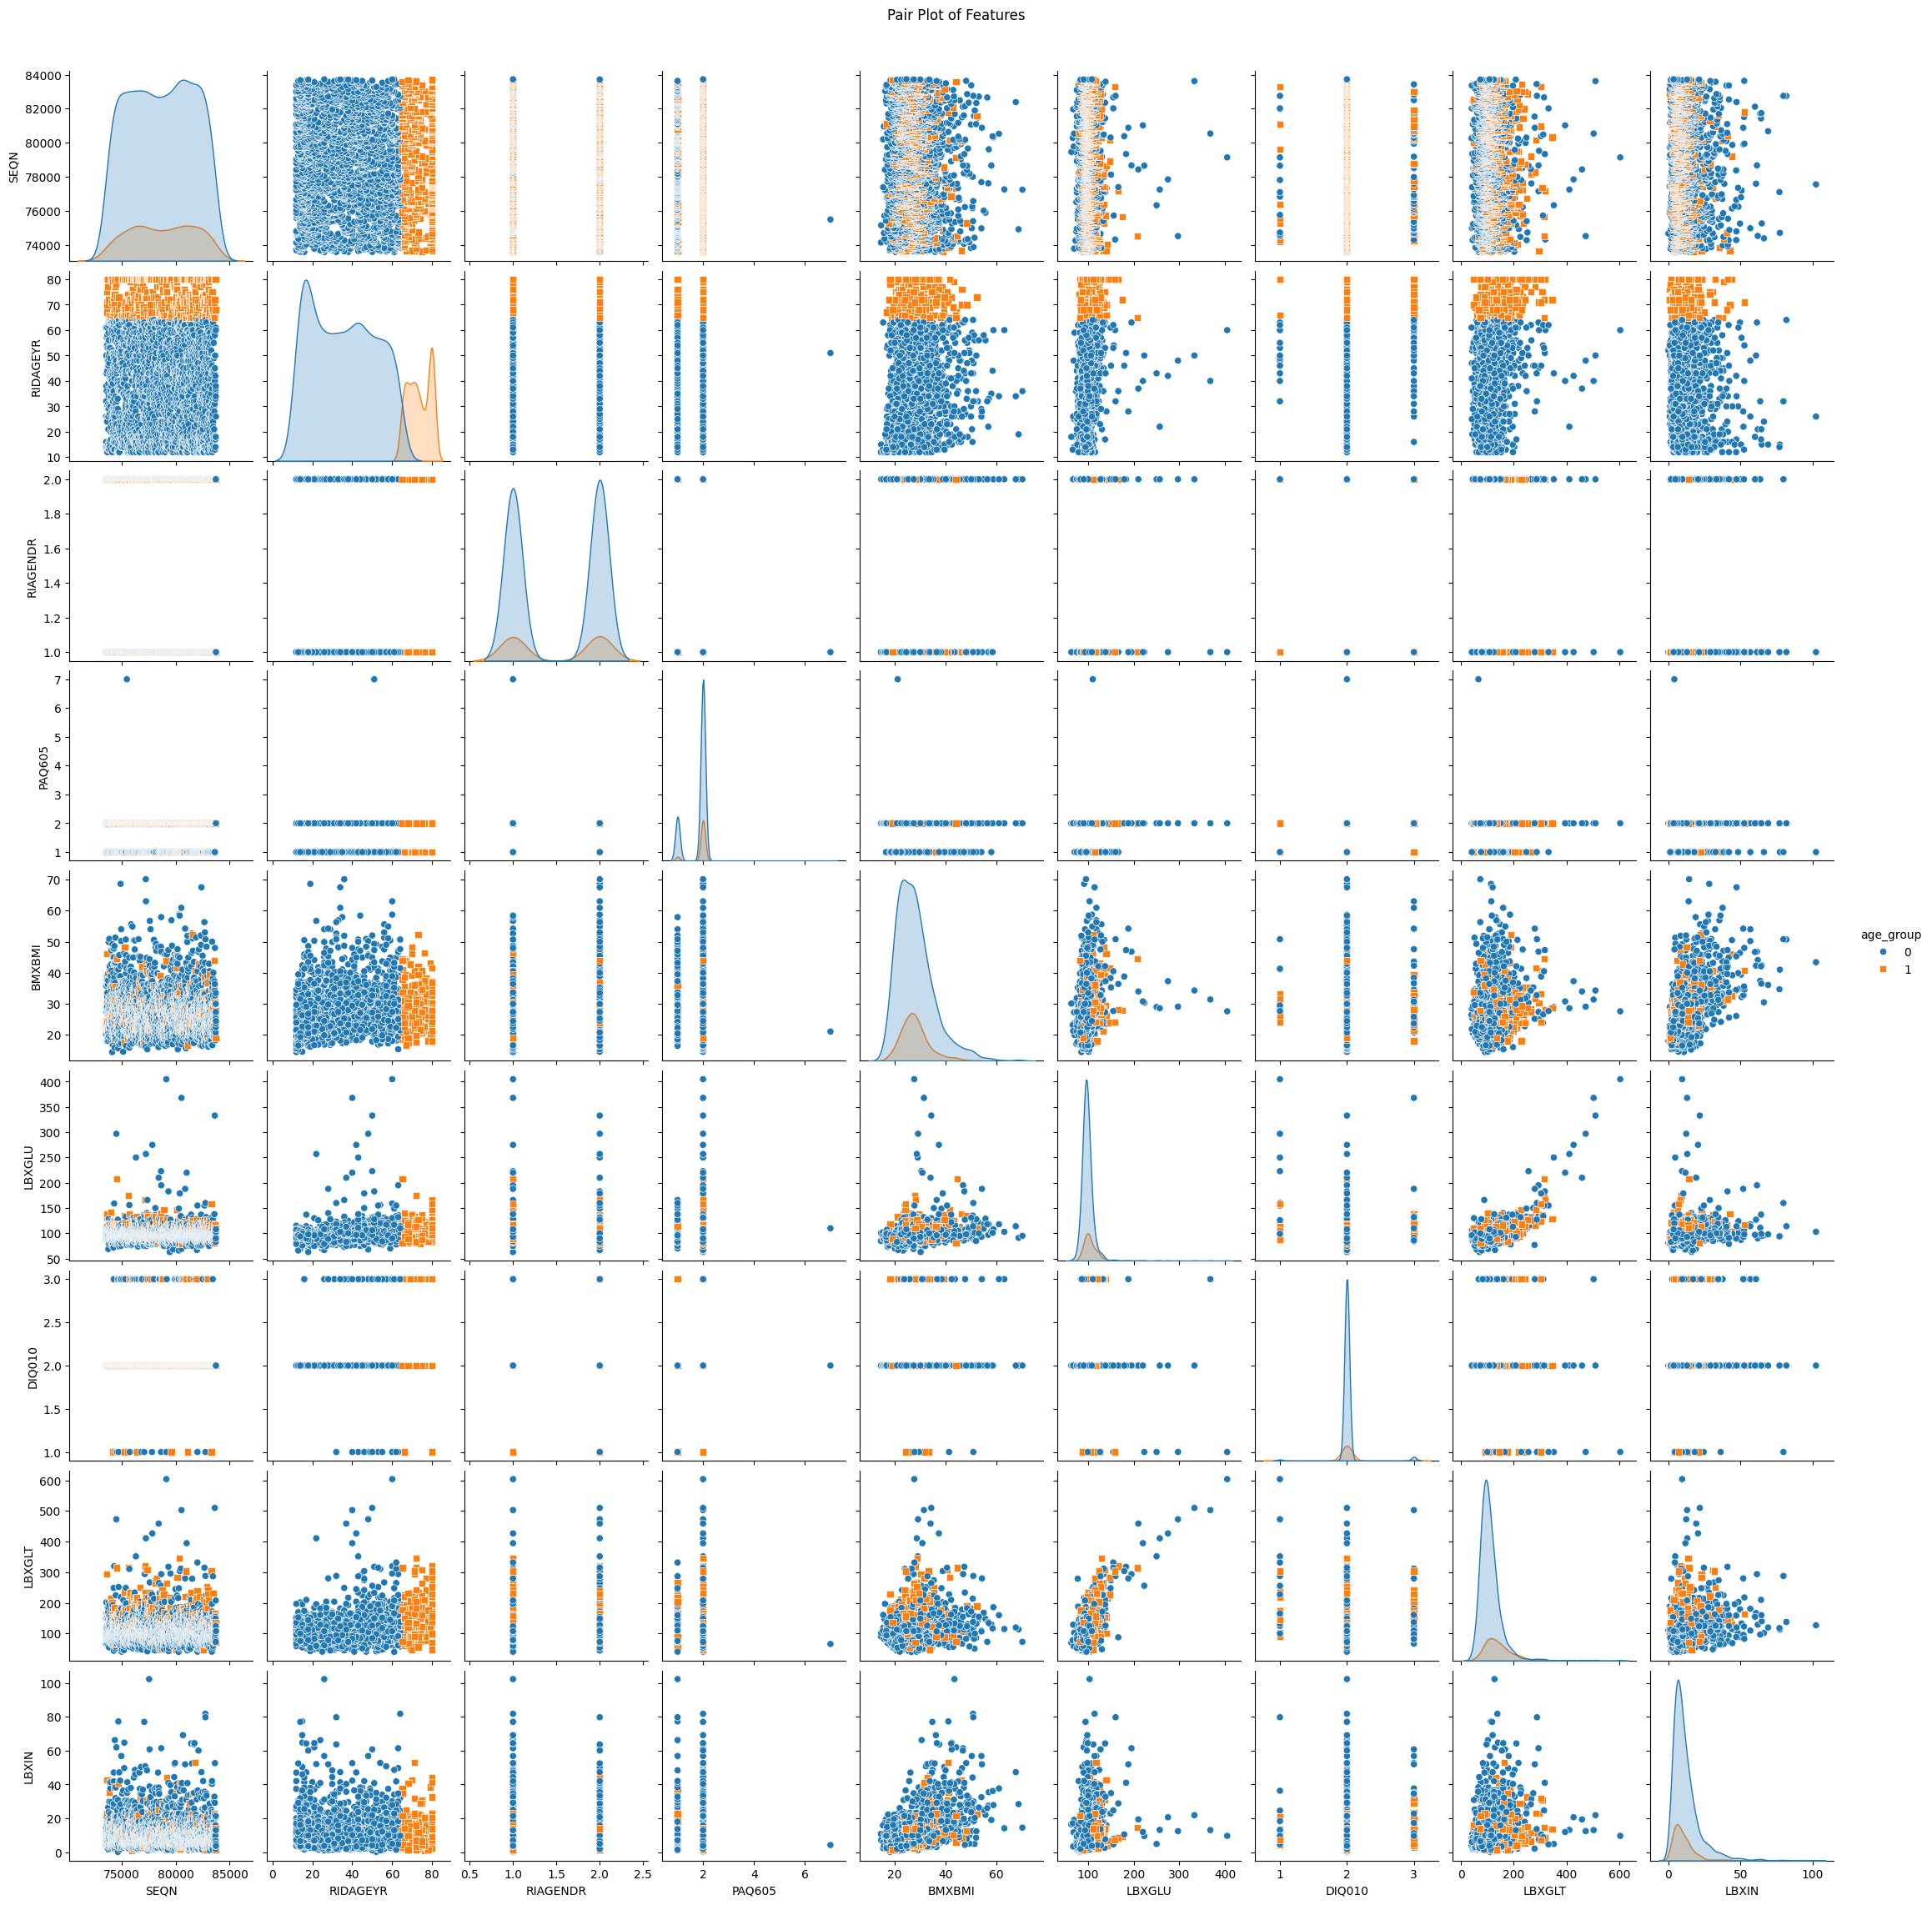

In [95]:
# Pair plot
sns.pairplot(df, hue='age_group', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

## Preparing the dataset

Prepare regular, standardized and PCA-reduced dataset for classification.

### Regular dataset

In [ ]:
# Separate input features and target variable
X = df.drop(['age_group', 'SEQN', 'RIDAGEYR'], axis=1)  # Input attributes
y = df['age_group']               # Target variable

# Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42, stratify = y)

# Inspecting the shape of the dataset and printing first five values
print(f"\nNumber of samples and attributes of X: {X.shape}\n")
print(X.head())


Number of samples and attributes of X: (2278, 7)

   RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4       2.0     1.0    35.9   103.0     2.0    81.0  10.92


### Standardized Dataset

Standardizing the data subtracts the mean and scales the values to unit standard deviation. It is applied to the input data to bring values to a standard range.

In [96]:
# Using the StandardScaler class to transform the regular data to Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

# Using train_test_split to create a new split for the Standardized input data
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42, stratify = y)

# Inspecting the shape of the dataset after Standardization and taking a peak into it
print(f"\nNumber of samples and attributes of X after standardization: {X_std.shape}\n")
X_std.head()


Number of samples and attributes of X after standardization: (2278, 7)



0         1         2         3         4         5         6
0  0.977428  0.444672  1.068639  0.584085 -0.087553  0.744323  0.316487
1  0.977428  0.444672 -1.056270 -0.590024 -0.087553 -0.743427 -0.821762
2 -1.023094  0.444672 -0.656125 -0.590024 -0.087553 -0.998470 -0.586084
3 -1.023094  0.444672  0.130367  0.248625 -0.087553 -0.658413  0.444103
4  0.977428 -2.062661  1.096235  0.192715 -0.087553 -0.722174 -0.094147

### PCA reduced dataset

Principal Component Analysis reduces the features of the data by finding their directions of maximum variance and projecting the data along those directions, thus preserving information of the original attributes and also reducing the size of the dataset for better computations and visualisations.


PCA Features: Number of samples and attributes: (2278, 2)


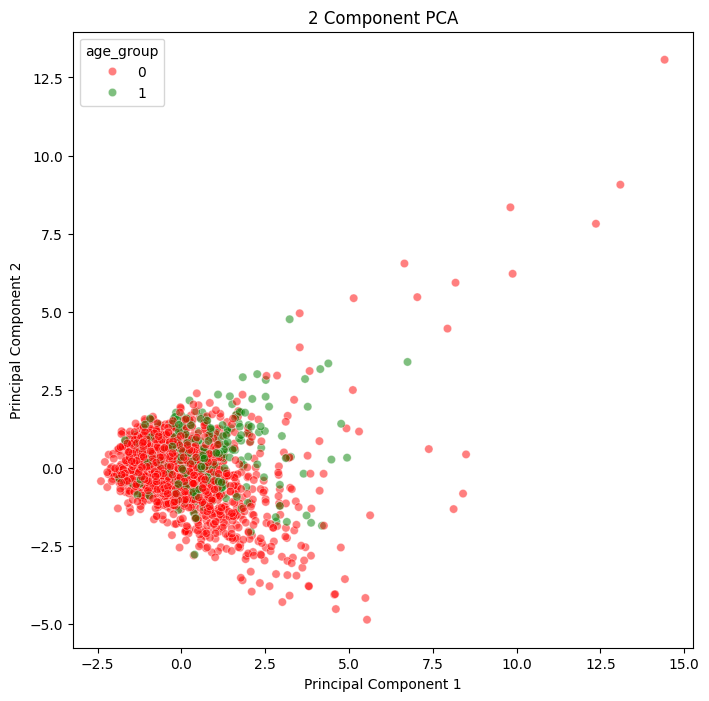

In [97]:
# Perform PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print(f'\nPCA Features: Number of samples and attributes: {X_pca.shape}')

# Using train_test_split to create a new split for the PCA reduced input data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42, stratify = y)

# Convert PCA result to DataFrame for visualization
pca_df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, df[['age_group']].reset_index(drop=True)], axis=1)

# Visualize the PCA results
plt.figure(figsize=(8,8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='age_group', data=pca_df, palette=['r', 'g'], alpha=0.5)
plt.title('2 Component PCA')
plt.show()


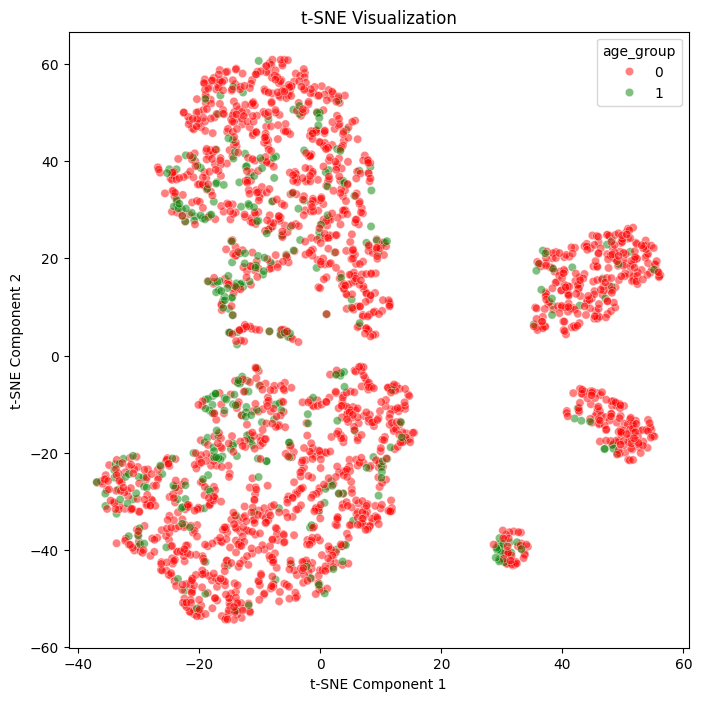

In [98]:
# Perform t-SNE
tsne = TSNE(n_components= 2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Convert t-SNE result to DataFrame for visualization
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df = pd.concat([tsne_df, df[['age_group']].reset_index(drop=True)], axis=1)

# Visualize the t-SNE results
plt.figure(figsize=(8, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='age_group', data=tsne_df, palette=['r', 'g'], alpha=0.5)
plt.title('t-SNE Visualization')
plt.show()


## Logistic Regression (Baseline Model)

### Regular Data


Logistic Regression (Baseline):
Accuracy score:  0.8280701754385965
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       479
           1       0.11      0.01      0.02        91

    accuracy                           0.83       570
   macro avg       0.48      0.50      0.46       570
weighted avg       0.72      0.83      0.76       570


 
 Cross Validation Score:  0.78797 +/- 0.01359


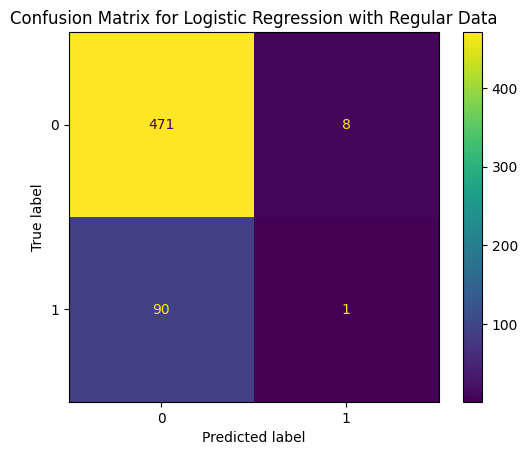

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression (Baseline):")
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

f1_score_log_reg = f1_score(y_test, y_pred, average = 'weighted')

cv_scores_model = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_model = (str(cv_scores_model.mean().round(5)) + ' +/- ' + str(cv_scores_model.std().round(5)))
print('\n', "\n Cross Validation Score: ", cv_score_model)

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with Regular Data")
plt.show()


### Standardized Data


Logistic Regression (Standardized):
Accuracy: 0.8315789473684211
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       479
           1       0.27      0.03      0.06        91

    accuracy                           0.83       570
   macro avg       0.56      0.51      0.48       570
weighted avg       0.75      0.83      0.77       570


 
 Cross Validation Score:  0.78694 +/- 0.0134


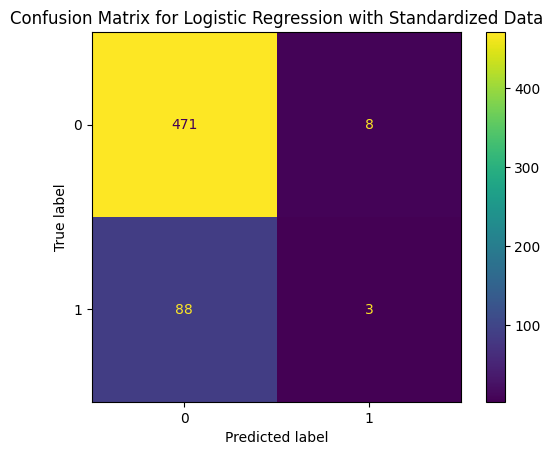

In [ ]:
log_reg_std = LogisticRegression()
log_reg_std.fit(X_train_std, y_train)
y_pred_std_log = log_reg_std.predict(X_test_std)
accuracy_std_log = accuracy_score(y_test, y_pred_std_log)
report_std_log = classification_report(y_test, y_pred_std_log)

print("\nLogistic Regression (Standardized):")
print(f"Accuracy: {accuracy_std_log}")
print(f"Classification Report:\n{report_std_log}")

cv_scores_log_reg_std = cross_val_score(log_reg_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_log_reg_std = (str(cv_scores_log_reg_std.mean().round(5)) + ' +/- ' + str(cv_scores_log_reg_std.std().round(5)))
print('\n', "\n Cross Validation Score: ", cv_score_log_reg_std)

f1_score_log_reg_std = f1_score(y_test, y_pred_std_log, average = 'weighted')

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_std_log))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with Standardized Data")
plt.show()

### PCA reduced data


Logistic Regression (PCA Reduced Data):
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       479
           1       0.00      0.00      0.00        91

    accuracy                           0.83       570
   macro avg       0.42      0.50      0.45       570
weighted avg       0.71      0.83      0.76       570


 
 Cross Validation Score:  0.77095 +/- 0.00346


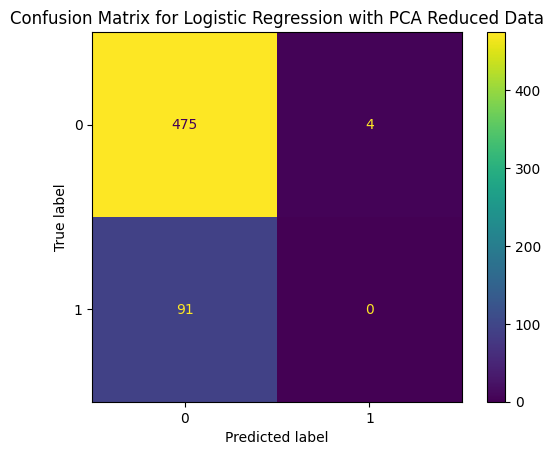

In [ ]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)
y_pred_log_pca = log_reg_pca.predict(X_test_pca)

accuracy_log_pca = accuracy_score(y_test, y_pred_log_pca)
report_log_pca = classification_report(y_test, y_pred_log_pca)

print("\nLogistic Regression (PCA Reduced Data):")
print(f"Accuracy: {accuracy_log_pca}")
print(f"Classification Report:\n{report_log_pca}")

cv_scores_log_reg_pca = cross_val_score(log_reg_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_log_reg_pca = (str(cv_scores_log_reg_pca.mean().round(5)) + ' +/- ' + str(cv_scores_log_reg_pca.std().round(5)))
print('\n', "\n Cross Validation Score: ", cv_score_log_reg_pca)

f1_score_log_reg_pca = f1_score(y_test, y_pred_log_pca, average = 'weighted')

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_log_pca))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with PCA Reduced Data")
plt.show()

## SVM Classification - Linear SVC

### Regular Data

Regular data

Classification accuracy:  0.32280701754385965

Cross validation score:  0.77538 +/- 0.0119
              precision    recall  f1-score   support

           0       0.94      0.21      0.34       479
           1       0.18      0.93      0.31        91

    accuracy                           0.32       570
   macro avg       0.56      0.57      0.32       570
weighted avg       0.82      0.32      0.33       570



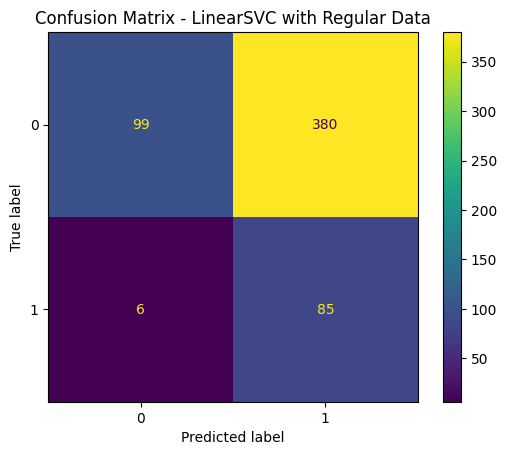

In [ ]:
# Fitting the data into LinearSVC model
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(C=2)
lin_svc.fit(X_train, y_train)

# The LinearSVC model's score on the testing data
print('Regular data')
lin_svc_score = lin_svc.score(X_test, y_test)
print('\nClassification accuracy: ', lin_svc_score)

# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std
cv_scores_linsvc = cross_val_score(lin_svc, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc = (str(cv_scores_linsvc.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc.std().round(5)))
print('\nCross validation score: ', cv_score_linsvc)

# LinearSVC Classification report
linsvc_report = classification_report(y_test, lin_svc.predict(X_test))
print(linsvc_report)

# Model's predictions on the test data
y_pred_linsvc = lin_svc.predict(X_test)
disp_linsvc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc))
disp_linsvc.plot()
plt.title('Confusion Matrix - LinearSVC with Regular Data')
plt.show()

f1_score_lin_svc = f1_score(y_test, y_pred_linsvc, average = "weighted")

### Standardised data

STANDARDIZED DATA
Classification accuracy:  0.8385964912280702
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       479
           1       0.43      0.03      0.06        91

    accuracy                           0.84       570
   macro avg       0.64      0.51      0.49       570
weighted avg       0.78      0.84      0.78       570


Cross Validation Score:  0.7756241281009955 +/- 0.00657


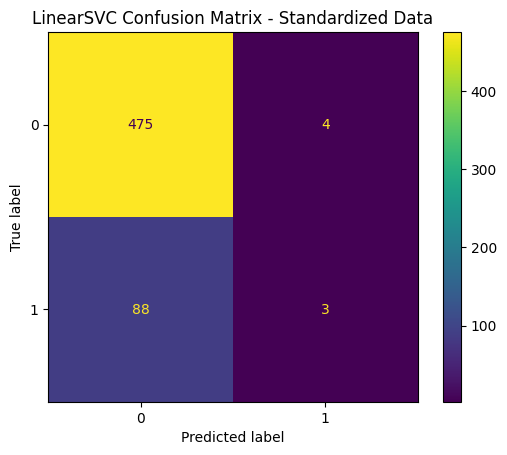

In [ ]:
# Fitting the Standardized data into LinearSVR model
lin_svc_std = LinearSVC(C=1)
lin_svc_std.fit(X_train_std, y_train)

# The LinearSVC model's score on the testing data
print('STANDARDIZED DATA')
lin_svc_score_std = lin_svc_std.score(X_test_std, y_test)
print('Classification accuracy: ', lin_svc_score_std)

# LinearSVC Classification report - After Standardization

linsvc_std_report = classification_report(y_test, lin_svc_std.predict(X_test_std))
print(linsvc_std_report)

# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc_std = cross_val_score(lin_svc_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc_std = (str(cv_scores_linsvc_std.mean()) + ' +/- ' + str(cv_scores_linsvc_std.std().round(5)))
print('\nCross Validation Score: ', cv_score_linsvc_std)

## Confusion Matrix - After Standardization

# Model's predictions on the test data
y_pred_linsvc_std = lin_svc_std.predict(X_test_std)

disp_linsvc_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc_std))
disp_linsvc_std.plot()
plt.title('LinearSVC Confusion Matrix - Standardized Data')
plt.show()

### PCA Reduced Data

PCA REDUCED DATA
Classification accuracy:  0.8333333333333334

Cross Validation Score: 0.76719 +/- 0.0015718421820417518
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       479
           1       0.00      0.00      0.00        91

    accuracy                           0.83       570
   macro avg       0.42      0.50      0.45       570
weighted avg       0.71      0.83      0.76       570



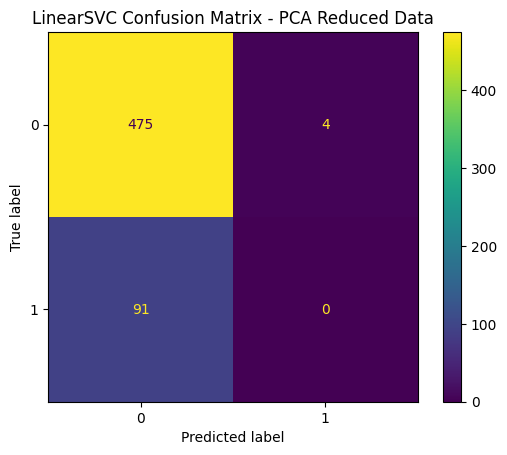

In [ ]:
# Fitting the PCA Reduced data into LinearSVC model
lin_svc_pca = LinearSVC(tol=0.01, C=2)
lin_svc_pca.fit(X_train_pca, y_train)

# The LinearSVC model's score on the testing data
print('PCA REDUCED DATA')
lin_svc_score_pca = lin_svc_pca.score(X_test_pca, y_test)
print('Classification accuracy: ', lin_svc_score_pca)

# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc_pca = cross_val_score(lin_svc_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc_pca = (str(cv_scores_linsvc_pca.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc_pca.std()))
print('\nCross Validation Score:', cv_score_linsvc_pca)

# LinearSVC Classification report - After PCA

linsvc_pca_report = classification_report(y_test, lin_svc_pca.predict(X_test_pca))
print(linsvc_pca_report)

## Confusion Matrix - After PCA

disp_linsvc_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = lin_svc_pca.predict(X_test_pca)))
disp_linsvc_pca.plot()
plt.title('LinearSVC Confusion Matrix - PCA Reduced Data')
plt.show()


## SVM with Kernel

### Linear Kernel

LINEAR KERNEL
Classification accuracy:  0.8403508771929824
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       479
           1       0.00      0.00      0.00        91

    accuracy                           0.84       570
   macro avg       0.42      0.50      0.46       570
weighted avg       0.71      0.84      0.77       570


Cross Validation:  0.7671904602442675 +/- 0.0016993403514893141


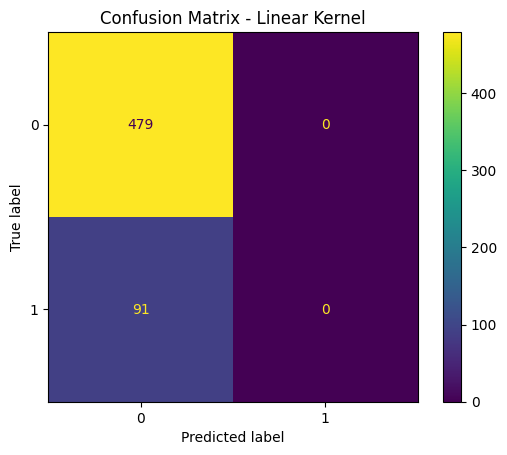

In [ ]:
# Fit the data into SVR model with linear kernel
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=2)
svc_lin.fit(X_train, y_train)

# Linear kernel SVC model's score on testing data
print('LINEAR KERNEL')
svc_lin_score = svc_lin.score(X_test, y_test)
print('Classification accuracy: ', svc_lin_score)

# Classification report - Linear Kernel SVC

svc_lin_report = classification_report(y_test, svc_lin.predict(X_test))
print(svc_lin_report)

# Cross validation of the Linear Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svclin = cross_val_score(svc_lin, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_svclin = (str(cv_scores_svclin.mean()) + ' +/- ' + str(cv_scores_svclin.std()))
print('\nCross Validation: ', cv_score_svclin)

## Confusion Matrix

# Model's predictions on the test data
y_pred_svclin = svc_lin.predict(X_test)

disp_svclin = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svclin))
disp_svclin.plot()
plt.title('Confusion Matrix - Linear Kernel')
plt.show()


### Polynomial Kernel

POLYNOMIAL KERNEL
Classification accuracy:  0.8403508771929824
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       479
           1       0.00      0.00      0.00        91

    accuracy                           0.84       570
   macro avg       0.42      0.50      0.46       570
weighted avg       0.71      0.84      0.77       570


 0.7668998361619611 +/- 0.00201


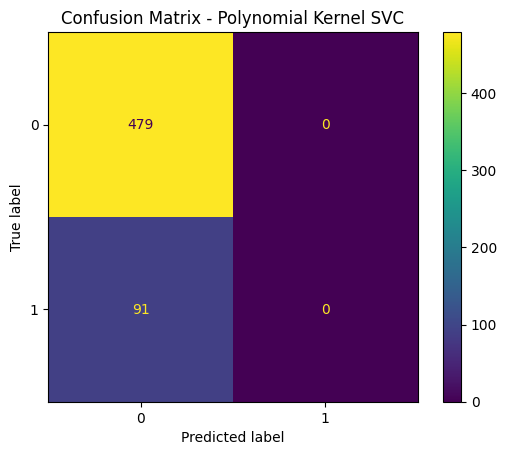

In [ ]:
# Fit the data into SVR model with polynomial kernel
svc_poly = SVC(kernel='poly', C=2)
svc_poly.fit(X_train, y_train)

# Polynomial kernel SVC model's score on testing data
print('POLYNOMIAL KERNEL')
svc_poly_score = svc_poly.score(X_test, y_test)
print('Classification accuracy: ', svc_poly_score)

# Classification report - Polynomial Kernel SVC

svc_poly_report = classification_report(y_test, svc_poly.predict(X_test))
print(svc_poly_report)

# Cross validation of the Polynomial Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svcpoly = cross_val_score(svc_poly, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_svcpoly = (str(cv_scores_svcpoly.mean()) + ' +/- ' + str(cv_scores_svcpoly.std().round(5)))
print('\n', cv_score_svcpoly)

#Confusion Matrix

# Model's predictions on the test data
y_pred_svcpoly = svc_poly.predict(X_test)

disp_svcpoly = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svcpoly))
disp_svcpoly.plot()
plt.title('Confusion Matrix - Polynomial Kernel SVC')
plt.show()

### RBF Kernel

RBF KERNEL
Classification accuracy:  0.8368421052631579
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       479
           1       0.25      0.01      0.02        91

    accuracy                           0.84       570
   macro avg       0.55      0.50      0.47       570
weighted avg       0.75      0.84      0.77       570


 0.77212 +/- 0.00394


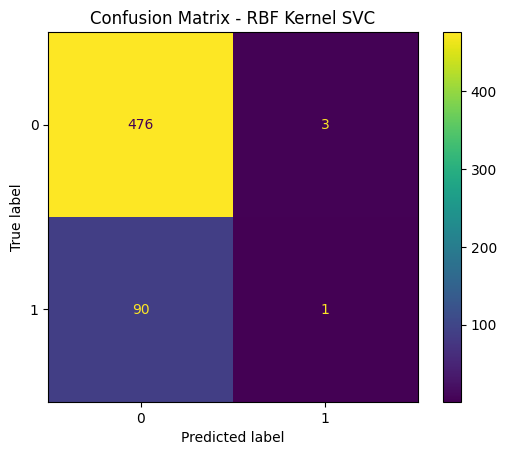

In [99]:
# Fit the data into SVR model with RBF kernel
svc_rbf = SVC(kernel='rbf', C=2, gamma='scale')
svc_rbf.fit(X_train, y_train)

# RBF kernel SVC model's score on testing data
print('RBF KERNEL')
svc_rbf_score = svc_rbf.score(X_test, y_test)
print('Classification accuracy: ', svc_rbf_score)

# Classification report - RBF Kernel SVC

svc_rbf_report = classification_report(y_test, svc_rbf.predict(X_test))
print(svc_rbf_report)

# Cross validation of the RBF Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svcrbf = cross_val_score(svc_rbf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_svcrbf = (str(cv_scores_svcrbf.mean().round(5)) + ' +/- ' + str(cv_scores_svcrbf.std().round(5)))
print('\n', cv_score_svcrbf)

## Confusion Matrix

disp_svcrbf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred =svc_rbf.predict(X_test)))
disp_svcrbf.plot()
plt.title('Confusion Matrix - RBF Kernel SVC')
plt.show()

RBF KERNEL - STANDARDISED DATA
Classification accuracy:  0.8403508771929824
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       479
           1       0.50      0.08      0.13        91

    accuracy                           0.84       570
   macro avg       0.67      0.53      0.52       570
weighted avg       0.79      0.84      0.79       570


 0.78665 +/- 0.0055


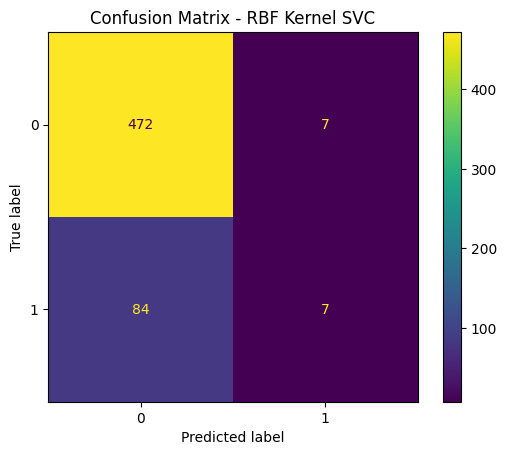

In [160]:
# Fit the data into SVR model with RBF kernel
svc_rbf = SVC(kernel='rbf', C=2, gamma='scale')
svc_rbf.fit(X_train_std, y_train)

# RBF kernel SVC model's score on testing data
print('RBF KERNEL - STANDARDISED DATA')
svc_rbf_score = svc_rbf.score(X_test_std, y_test)
print('Classification accuracy: ', svc_rbf_score)

# Classification report - RBF Kernel SVC

svc_rbf_report = classification_report(y_test, svc_rbf.predict(X_test_std))
print(svc_rbf_report)

# Cross validation of the RBF Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svcrbf = cross_val_score(svc_rbf, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_svcrbf = (str(cv_scores_svcrbf.mean().round(5)) + ' +/- ' + str(cv_scores_svcrbf.std().round(5)))
print('\n', cv_score_svcrbf)

## Confusion Matrix

# Model's predictions on the test data
y_pred_svcrbf = svc_rbf.predict(X_test_std)

disp_svcrbf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svcrbf))
disp_svcrbf.plot()
plt.title('Confusion Matrix - RBF Kernel SVC')
plt.show()

## Decision Trees

### Regular Data

REGULAR DATA
Classification accuracy:  0.7543859649122807

 0.76371 +/- 0.02144
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       479
           1       0.22      0.22      0.22        91

    accuracy                           0.75       570
   macro avg       0.54      0.54      0.54       570
weighted avg       0.75      0.75      0.75       570



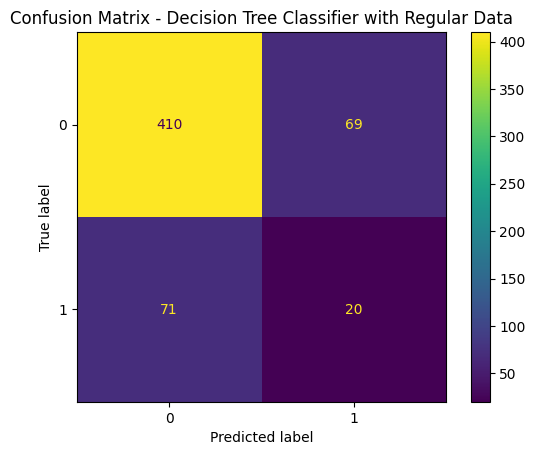

In [ ]:
# Importing the DecisionTreeClassifier class from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Fitting the data into Decision Tree Classifier model
DT_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
DT_clf.fit(X_train, y_train)

# The Decision Tree Classifier model's score on the testing data
print('REGULAR DATA')
DT_clf_score = DT_clf.score(X_test, y_test)
print('Classification accuracy: ', DT_clf_score)

# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT = cross_val_score(DT_clf, X_train, y_train, scoring='f1_weighted', cv = 5)
cv_score_DT = (str(cv_scores_DT.mean().round(5)) + ' +/- ' + str(cv_scores_DT.std().round(5)))
print('\n', cv_score_DT)

# Model's predictions on the test data
y_pred_DT = DT_clf.predict(X_test)

# Report
DT_report = classification_report(y_test, y_pred_DT)
print(DT_report)

## Confusion Matrix
disp_DT = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT))
disp_DT.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with Regular Data')
plt.show()

### Standardized Data

It is demonstrated through this experiment that feature scaling is not important for CART algorithm (decision trees or random forest).

STANDARDIZED DATA
Classification accuracy:  0.8122807017543859

 0.7917 +/- 0.01238
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       479
           1       0.31      0.14      0.20        91

    accuracy                           0.81       570
   macro avg       0.58      0.54      0.54       570
weighted avg       0.77      0.81      0.78       570



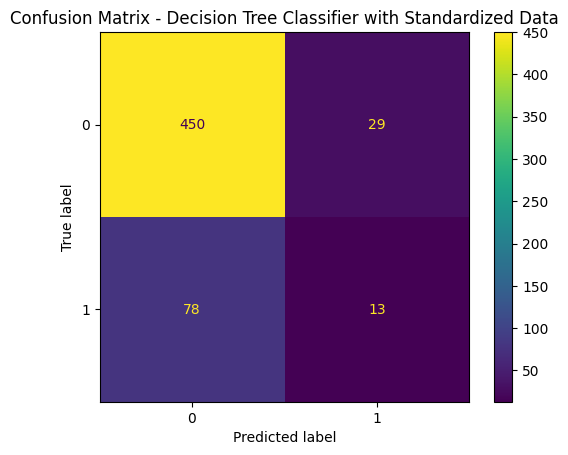


 0.7917048942224019 +/- 0.01238


In [161]:
# Fitting the Standardized data into Decision Tree Classifier model
DT_clf_std = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print("STANDARDIZED DATA")
DT_clf_score_std = DT_clf_std.score(X_test_std, y_test)
print('Classification accuracy: ', DT_clf_score_std)

# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT_std = cross_val_score(DT_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_DT_std = (str(cv_scores_DT_std.mean().round(5)) + ' +/- ' + str(cv_scores_DT_std.std().round(5)))
print('\n', cv_score_DT_std)

# Model's predictions on the test data
y_pred_DT_std = DT_clf_std.predict(X_test_std)

# Classification report - After Standardization

DT_report_std = classification_report(y_test, y_pred_DT_std)
print(DT_report_std)

## Confusion Matrix - After Standardization

disp_DT_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT_std))
disp_DT_std.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with Standardized Data')
plt.show()


### PCA Reduced Data

PCA REDUCED DATA
Classification accuracy:  0.8087719298245614
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       479
           1       0.22      0.08      0.11        91

    accuracy                           0.81       570
   macro avg       0.53      0.51      0.50       570
weighted avg       0.74      0.81      0.77       570


 0.78524449871882 +/- 0.01967


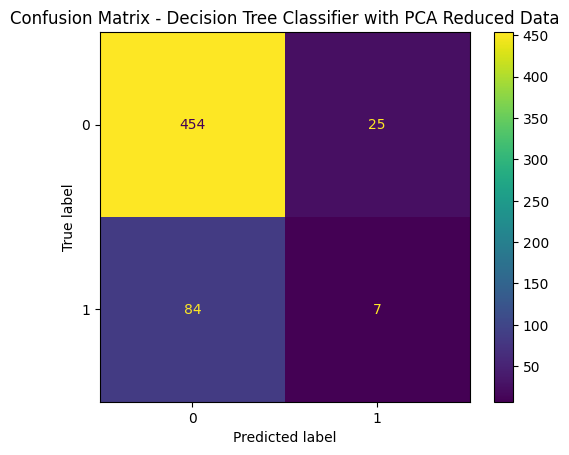

In [ ]:
# Fitting the PCA Reduced data into Decision Tree Classifier model
DT_clf_pca = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
DT_clf_score_pca = DT_clf_pca.score(X_test_pca, y_test)
print('Classification accuracy: ', DT_clf_score_pca)

# Classification report - After PCA

y_pred_DT_pca = DT_clf_pca.predict(X_test_pca)

DT_report_pca = classification_report(y_test, y_pred_DT_pca)
print(DT_report_pca)

# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT_pca = cross_val_score(DT_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_DT_pca = (str(cv_scores_DT_pca.mean()) + ' +/- ' + str(cv_scores_DT_pca.std().round(5)))
print('\n', cv_score_DT_pca)

## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_DT_pca = DT_clf_pca.predict(X_test_pca)

disp_DT_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT_pca))
disp_DT_pca.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with PCA Reduced Data')
plt.show()

## Random Forest

### Regular Data

REGULAR DATA
R2 score:  0.8456140350877193
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       479
           1       0.64      0.08      0.14        91

    accuracy                           0.85       570
   macro avg       0.74      0.53      0.53       570
weighted avg       0.82      0.85      0.79       570


Cross Validation Score:  0.7897 +/- 0.00554


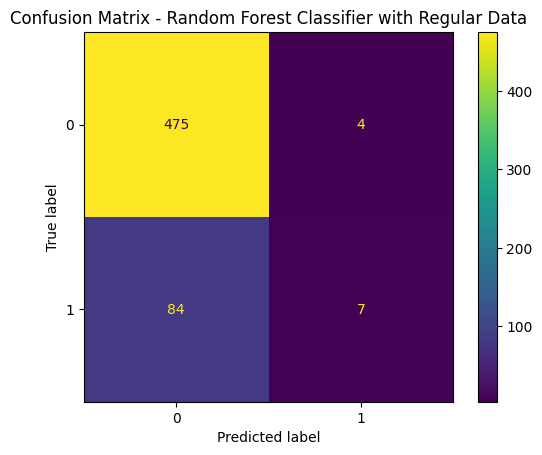

In [ ]:
# Importing the RandomForestClassifier class from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Fitting the data into Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf.fit(X_train, y_train)

# The Random Forest model's score on the testing data
print('REGULAR DATA')
RF_clf_score = RF_clf.score(X_test, y_test)
print('R2 score: ', RF_clf_score)

# Model's predictions on the test data
y_pred_RF = RF_clf.predict(X_test)

# Random Forest Classifier - Classification report

RF_report = classification_report(y_test, y_pred_RF)
print(RF_report)

# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF = cross_val_score(RF_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_RF = (str(cv_scores_RF.mean().round(5)) + ' +/- ' + str(cv_scores_RF.std().round(5)))
print('\nCross Validation Score: ', cv_score_RF)

## Confusion Matrix

disp_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF))
disp_RF.plot()
plt.title('Confusion Matrix - Random Forest Classifier with Regular Data')
plt.show()

### Standardized data

It is demonstrated through this experiment that feature scaling is not important for CART algorithm (decision trees or random forest).

STANDARDIZED DATA
R2 score:  0.8456140350877193
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       479
           1       0.64      0.08      0.14        91

    accuracy                           0.85       570
   macro avg       0.74      0.53      0.53       570
weighted avg       0.82      0.85      0.79       570


Cross Validation Score:  0.79128 +/- 0.00767


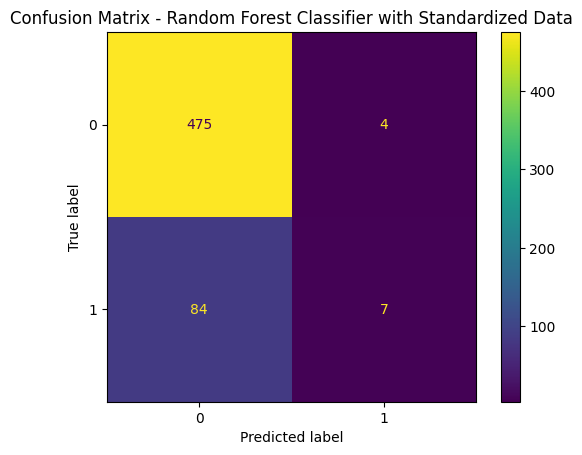

In [ ]:
# Fitting the Standardized data into Random Forest Classifier model
RF_clf_std = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print("STANDARDIZED DATA")
RF_clf_score_std = RF_clf_std.score(X_test_std, y_test)
print('R2 score: ', RF_clf_score_std)

# Model's predictions on the test data
y_pred_RF_std = RF_clf_std.predict(X_test_std)

# Report
RF_report_std = classification_report(y_test, y_pred_RF_std)
print(RF_report_std)

# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std
cv_scores_RF_std = cross_val_score(RF_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_RF_std = (str(cv_scores_RF_std.mean().round(5)) + ' +/- ' + str(cv_scores_RF_std.std().round(5)))
print('\nCross Validation Score: ', cv_score_RF_std)

## Confusion Matrix - After Standardization
disp_RF_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF_std))
disp_RF_std.plot()
plt.title('Confusion Matrix - Random Forest Classifier with Standardized Data')
plt.show()

### PCA Reduced Data

PCA REDUCED DATA
R2 score:  0.8350877192982457
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       479
           1       0.40      0.07      0.11        91

    accuracy                           0.84       570
   macro avg       0.62      0.52      0.51       570
weighted avg       0.78      0.84      0.78       570


Cross Validation Score:  0.78488 +/- 0.01085


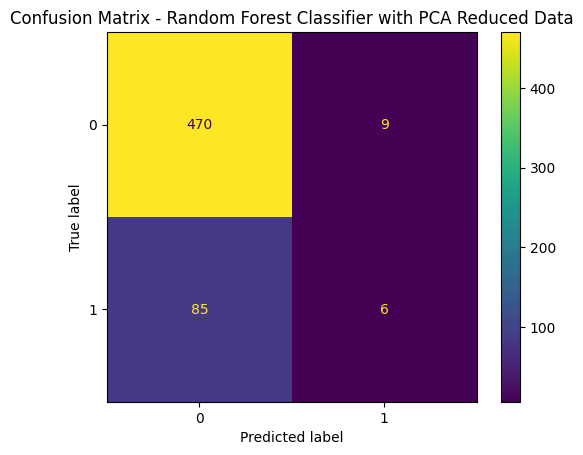

In [ ]:
# Fitting the PCA Reduced data into Random Forest Classifier model
RF_clf_pca = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print("PCA REDUCED DATA")
RF_clf_score_pca = RF_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', RF_clf_score_pca)

# Model's predictions on the test data
y_pred_RF_pca = RF_clf_pca.predict(X_test_pca)

# Classification report - After Standardization

RF_report_pca = classification_report(y_test, y_pred_RF_pca)
print(RF_report_pca)

# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF_pca = cross_val_score(RF_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_RF_pca = (str(cv_scores_RF_pca.mean().round(5)) + ' +/- ' + str(cv_scores_RF_pca.std().round(5)))
print('\nCross Validation Score: ', cv_score_RF_pca)

## Confusion Matrix - After PCA

disp_RF_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF_pca))
disp_RF_pca.plot()
plt.title('Confusion Matrix - Random Forest Classifier with PCA Reduced Data')
plt.show()

## AdaBoost (Adaptive Boosting)

### Regular Data

REGULAR DATA
Classification Accuracy:  0.8192982456140351
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       479
           1       0.36      0.18      0.24        91

    accuracy                           0.82       570
   macro avg       0.61      0.56      0.57       570
weighted avg       0.78      0.82      0.79       570


Cross Validation Score:  0.79553 +/- 0.01


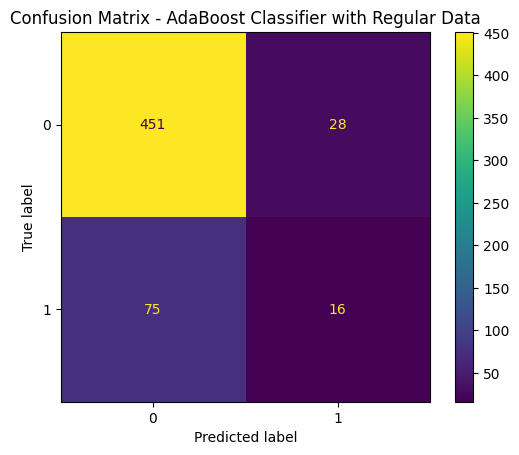

In [ ]:
# Importing the AdaBoostClassifier class from Scikit-Learn
from sklearn.ensemble import AdaBoostClassifier

# Fitting the data into AdaBoost Classifier model
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf.fit(X_train, y_train)

# Model's predictions on the test data
y_pred_ada = ada_clf.predict(X_test)

# The model's score on the testing data
print('REGULAR DATA')
ada_clf_score = ada_clf.score(X_test, y_test)
print('Classification Accuracy: ', ada_clf_score)

# AdaBoost Classifier - Classification report

ada_report = classification_report(y_test, y_pred_ada)
print(ada_report)

# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada = cross_val_score(ada_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_ada = (str(cv_scores_ada.mean().round(5)) + ' +/- ' + str(cv_scores_ada.std().round(5)))
print('\nCross Validation Score: ', cv_score_ada)

## Confusion Matrix

disp_ada = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada))
disp_ada.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with Regular Data')
plt.show()


### Standardised Data

It is demonstrated through this experiment that feature scaling is not important for CART algorithm (decision trees or random forest).

STANDARDIZED DATA
R2 score:  0.8192982456140351
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       479
           1       0.36      0.18      0.24        91

    accuracy                           0.82       570
   macro avg       0.61      0.56      0.57       570
weighted avg       0.78      0.82      0.79       570


Cross Validation Score:  0.79591 +/- 0.009060481031895202


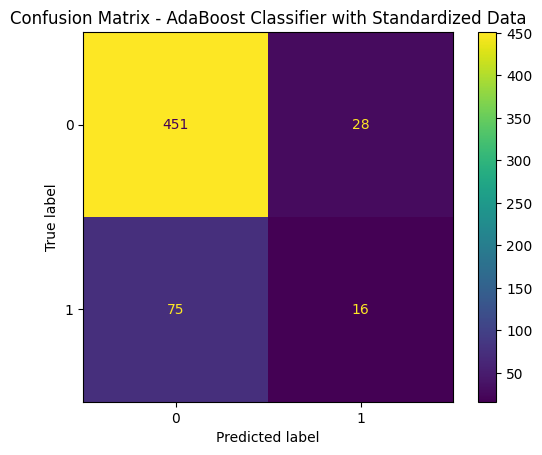

In [ ]:
# Fitting the data into AdaBoost Classifier model
ada_clf_std = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf_std.fit(X_train_std, y_train)

# Model's predictions on the test data
y_pred_ada_std = ada_clf_std.predict(X_test_std)

# The model's score on the testing data
print('STANDARDIZED DATA')
ada_clf_score_std = ada_clf_std.score(X_test_std, y_test)
print('R2 score: ', ada_clf_score_std)


# AdaBoost Classifier - Classification report

ada_report_std = classification_report(y_test, y_pred_ada_std)
print(ada_report_std)

# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada_std = cross_val_score(ada_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_ada_std = (str(cv_scores_ada_std.mean().round(5)) + ' +/- ' + str(cv_scores_ada_std.std()))
print('\nCross Validation Score: ', cv_score_ada_std)

## Confusion Matrix

disp_ada_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada_std))
disp_ada_std.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with Standardized Data')
plt.show()

### PCA reduced data

PCA REDUCED DATA
R2 score:  0.7824561403508772
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       479
           1       0.15      0.08      0.10        91

    accuracy                           0.78       570
   macro avg       0.49      0.50      0.49       570
weighted avg       0.73      0.78      0.75       570


 0.78287 +/- 0.00758


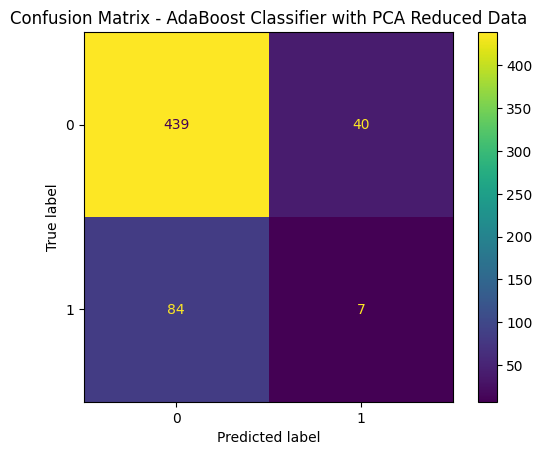

In [ ]:
# Fitting the data into AdaBoost Classifier model
ada_clf_pca = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf_pca.fit(X_train_pca, y_train)

# Model's predictions on the test data
y_pred_ada_pca = ada_clf_pca.predict(X_test_pca)

# The model's score on the testing data
print('PCA REDUCED DATA')
ada_clf_score_pca = ada_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', ada_clf_score_pca)

# AdaBoost Classifier - Classification report

ada_report_pca = classification_report(y_test, y_pred_ada_pca)
print(ada_report_pca)

# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada_pca = cross_val_score(ada_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_ada_pca = (str(cv_scores_ada_pca.mean().round(5)) + ' +/- ' + str(cv_scores_ada_pca.std().round(5)))
print('\n', cv_score_ada_pca)

## Confusion Matrix

disp_ada_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada_pca))
disp_ada_pca.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with PCA Reduced Data')
plt.show()

## Gradient Boosting

### Regular Data

REGULAR DATA
R2 score:  0.8280701754385965
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       479
           1       0.43      0.24      0.31        91

    accuracy                           0.83       570
   macro avg       0.65      0.59      0.61       570
weighted avg       0.80      0.83      0.81       570


Cross Validation Score:  0.7975 +/- 0.00519


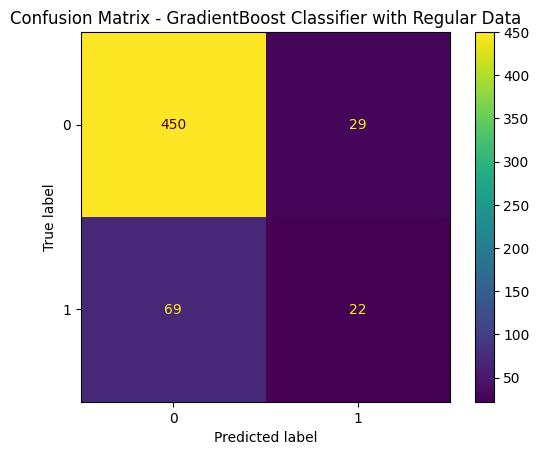

In [ ]:
# Importing the GradientBoostingClassifier class from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

# Fitting the data into GradientBoost Classifier model
grad_clf = GradientBoostingClassifier(max_leaf_nodes=32, n_estimators=100, learning_rate=0.5, random_state=42)
grad_clf.fit(X_train, y_train)

# The model's score on the testing data
print('REGULAR DATA')
grad_clf_score = grad_clf.score(X_test, y_test)
print('R2 score: ', grad_clf_score)

# Model's predictions on the test data
y_pred_grad = grad_clf.predict(X_test)

# GradientBoost Classifier - Classification report

grad_report = classification_report(y_test, y_pred_grad)
print(grad_report)

# Cross validation of the GradientBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_grad = cross_val_score(grad_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_grad = (str(cv_scores_grad.mean().round(5)) + ' +/- ' + str(cv_scores_grad.std().round(5)))
print('\nCross Validation Score: ', cv_score_grad)

## Confusion Matrix

disp_grad = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_grad))
disp_grad.plot()
plt.title('Confusion Matrix - GradientBoost Classifier with Regular Data')
plt.show()

### Standardized Data

It is demonstrated through this experiment that feature scaling is not important for CART algorithm (decision trees or random forest).

STANDARDIZED DATA
R2 score:  0.8280701754385965
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       479
           1       0.43      0.24      0.31        91

    accuracy                           0.83       570
   macro avg       0.65      0.59      0.61       570
weighted avg       0.80      0.83      0.81       570


 0.7975 +/- 0.00519


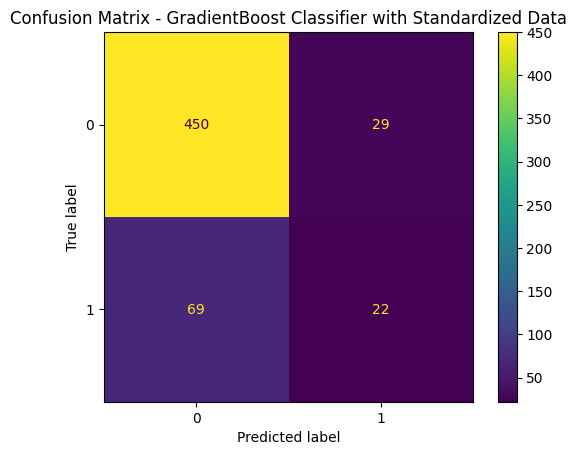

In [ ]:
# Fitting the data into GradientBoost Classifier model
grad_clf_std = GradientBoostingClassifier(max_leaf_nodes=32, n_estimators=100, learning_rate=0.5, random_state=42)
grad_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print('STANDARDIZED DATA')
grad_clf_score_std = grad_clf_std.score(X_test_std, y_test)
print('R2 score: ', grad_clf_score_std)

# Model's predictions on the test data
y_pred_grad_std = grad_clf_std.predict(X_test_std)

# GradientBoost Classifier - Classification report

grad_report_std = classification_report(y_test, y_pred_grad_std)
print(grad_report_std)

# Cross validation of the GradientBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_grad_std = cross_val_score(grad_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_grad_std = (str(cv_scores_grad_std.mean().round(5)) + ' +/- ' + str(cv_scores_grad_std.std().round(5)))
print('\n', cv_score_grad_std)

## Confusion Matrix
disp_grad_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_grad_std))
disp_grad_std.plot()
plt.title('Confusion Matrix - GradientBoost Classifier with Standardized Data')
plt.show()

### PCA Reduced Data

PCA REDUCED DATA
R2 score:  0.7842105263157895
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       479
           1       0.19      0.11      0.14        91

    accuracy                           0.78       570
   macro avg       0.52      0.51      0.51       570
weighted avg       0.74      0.78      0.76       570


 0.77964 +/- 0.00856


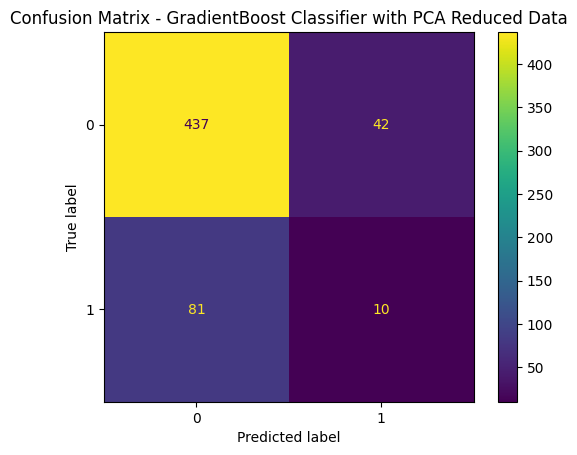

In [ ]:
# Fitting the data into GradientBoost Classifier model
grad_clf_pca = GradientBoostingClassifier(max_leaf_nodes=32, n_estimators=100, learning_rate=0.5, random_state=42)
grad_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
grad_clf_score_pca = grad_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', grad_clf_score_pca)

# Model's predictions on the test data
y_pred_grad_pca = grad_clf_pca.predict(X_test_pca)


# GradientBoost Classifier - Classification report

grad_report_pca = classification_report(y_test, y_pred_grad_pca)
print(grad_report_pca)

# Cross validation of the GradientBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_grad_pca = cross_val_score(grad_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_grad_pca = (str(cv_scores_grad_pca.mean().round(5)) + ' +/- ' + str(cv_scores_grad_pca.std().round(5)))
print('\n', cv_score_grad_pca)

## Confusion Matrix

disp_grad_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_grad_pca))
disp_grad_pca.plot()
plt.title('Confusion Matrix - GradientBoost Classifier with PCA Reduced Data')
plt.show()

## Model Performance Evaluation

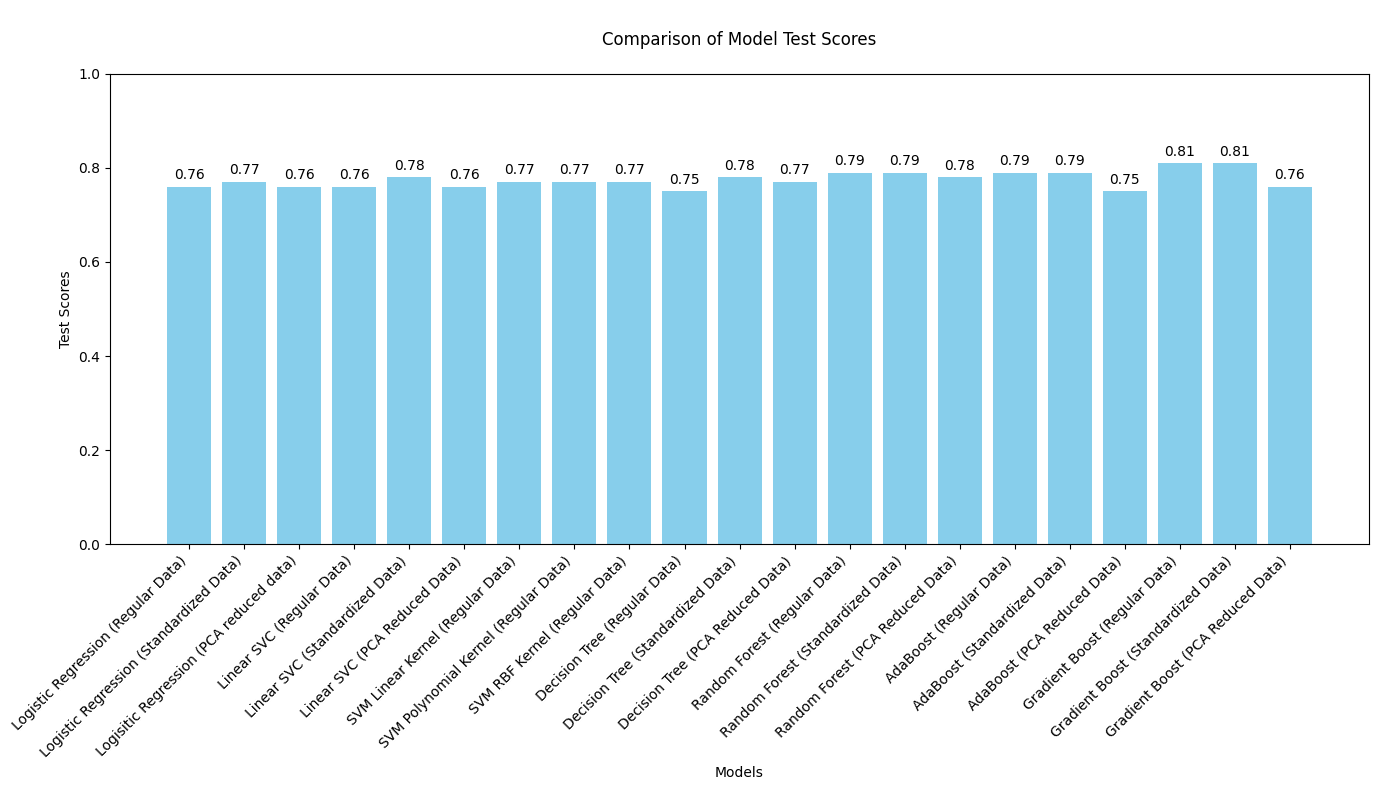

In [ ]:
models = [
    'Logistic Regression (Regular Data)', 'Logistic Regression (Standardized Data)', 'Logisitic Regression (PCA reduced data)', 
    'Linear SVC (Regular Data)', 'Linear SVC (Standardized Data)', 'Linear SVC (PCA Reduced Data)', 
    'SVM Linear Kernel (Regular Data)', 'SVM Polynomial Kernel (Regular Data)', 'SVM RBF Kernel (Regular Data)', 
    'Decision Tree (Regular Data)', 'Decision Tree (Standardized Data)', 'Decision Tree (PCA Reduced Data)',
    'Random Forest (Regular Data)', 'Random Forest (Standardized Data)', 'Random Forest (PCA Reduced Data)',
    'AdaBoost (Regular Data)', 'AdaBoost (Standardized Data)', 'AdaBoost (PCA Reduced Data)', 
    'Gradient Boost (Regular Data)', 'Gradient Boost (Standardized Data)', 'Gradient Boost (PCA Reduced Data)'
]

scores = [
0.76,  0.77, 0.76,
0.76, 0.78, 0.76,
0.77, 0.77, 0.77,
0.75, 0.78, 0.77,
0.79, 0.79, 0.78,
0.79, 0.79, 0.75,
0.81,  0.81, 0.76
]

plt.figure(figsize=(14, 8))
bars = plt.bar(models, scores, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.title('\nComparison of Model Test Scores\n')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

### SVM (RBF Kernel)

In [90]:
# Inspecting the Hyperparameter space of the model
ht_rbf = SVC(kernel= "rbf")
ht_rbf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [121]:
param_grid = {
    'C': np.linspace(1,10, 10),  
    'gamma': np.linspace(0.01,0.1, 10)  
}

# Initialize the SVR model
svr = SVC(kernel='rbf')

# Importing the GridSearchCV class from Scikit-Learn
gs_svr = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fitting the data into the GridSearchCV model
gs_svr.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator:", gs_svr.best_estimator_)
print("Best parameters:", gs_svr.best_params_)
gs_svr_score = gs_svr.best_score_
print("Best Cross-validated accuracy score:", gs_svr_score)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[CV] END ..................................C=1.0, gamma=0.01; total time=   0.0s
[CV] END ..................C=1.0, gamma=0.020000000000000004; total time=   0.1s
[CV] END ..................................C=1.0, gamma=0.01; total time=   0.1s
[CV] END ..................................C=1.0, gamma=0.01; total time=   0.1s
[CV] END ..................C=1.0, gamma=0.020000000000000004; total time=   0.1s
[CV] END ..................................C=1.0, gamma=0.01; total time=   0.1s
[CV] END ..................................C=1.0, gamma=0.01; total time=   0.1s
[CV] END ..................C=1.0, gamma=0.020000000000000004; total time=   0.1s
[CV] END ..................C=1.0, gamma=0.020000000000000004; total time=   0.1s
[CV] END ..................C=1.0, gamma=0.020000000000000004; total time=   0.0s
[CV] END ..................C=1.0, gamma=0.030000000000000006; total time=   0.0s
[CV] END ..................C=1.0, gamma=0.030000000000000006; total time=   0.1s
[CV] END ..................C

### Decision Tree

In [107]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 21),  # Values from 1 to 20
    'min_samples_split': range(2, 21, 2),  # Even values from 2 to 20
    'min_samples_leaf': range(1, 11)  # Values from 1 to 10
}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Importing the GridSearchCV class from Scikit-Learn
gs_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fitting the data into the GridSearchCV model
gs_dt.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding accuracy score
print("Best estimator:", gs_dt.best_estimator_)
print("Best parameters:", gs_dt.best_params_)
gs_dt_score = gs_dt.best_score_
print("Best Cross-validated Classification accuracy:", gs_dt_score)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_le

### Random Forest

In [ ]:
# Inspecting the Hyperparameter space of the model
ht_RF = RandomForestClassifier(n_jobs=-1, random_state=42)
ht_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Creating a grid of the interested hyperparameters and range within which to tune
ht_RF_grid = [{
    'max_leaf_nodes': list(range(4, 257, 4)),  # Generates values from 4 to 256 with a step of 4
    'n_estimators': list(range(25, 275, 25)),  # Generates values from 25 to 250 with a step of 25
    'n_jobs': [-1],  # Number of jobs to run in parallel, using all processors
    'random_state': [42, 84, 126]  # Specified values for random_state
}]


# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_RF = GridSearchCV(estimator = ht_RF, param_grid = ht_RF_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_RF.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_RF.best_estimator_)
print("Best parameters", gs_RF.best_params_)
gs_RF_score = gs_RF.best_score_
print("Best Cross-validated Classification accuracy", gs_RF_score)

Best estimator RandomForestClassifier(max_leaf_nodes=132, n_jobs=-1, random_state=42)
Best parameters {'max_leaf_nodes': 132, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
Best Cross-validated Classification accuracy 0.8477765773181734


### AdaBoost

In [77]:
# Inspecting the Hyperparameter space of the model
ht_ada = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), algorithm='SAMME.R', random_state=42)
ht_ada.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': 32,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_leaf_nodes=32),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [84]:
ht_ada_grid = [{
    'learning_rate': np.linspace(0.01, 2, 20),  # 20 values between 0.01 and 2
    'n_estimators': range(50, 301, 50),  # Values from 50 to 300 with a step of 50
    'estimator__max_leaf_nodes': range(16, 65, 16),  # Values 16, 32, 48, 64
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42]
}]
# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_ada = GridSearchCV(estimator = ht_ada, param_grid = ht_ada_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_ada.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_ada.best_estimator_)
print("Best parameters", gs_ada.best_params_)
gs_ada_score = gs_ada.best_score_
print("Best Cross-validated Classification accuracy", gs_ada_score)

Best estimator AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=48),
                   learning_rate=1.6857894736842105, n_estimators=150,
                   random_state=42)
Best parameters {'algorithm': 'SAMME.R', 'estimator__max_leaf_nodes': 48, 'learning_rate': 1.6857894736842105, 'n_estimators': 150, 'random_state': 42}
Best Cross-validated Classification accuracy 0.846612131501775


### Gradient Boost

In [ ]:
# Inspecting the Hyperparameter space of the model
ht_grad = GradientBoostingClassifier(max_leaf_nodes=32, random_state=42)
ht_grad.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 32,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [85]:
# Creating a grid of the interested hyperparameters and range within which to tune
ht_grad_grid = [{
    'learning_rate': np.linspace(0.01, 1, 20),  # 10 values between 0.01 and 1
    'n_estimators': range(50, 301, 50),  # Values from 50 to 300 with a step of 50
    'max_leaf_nodes': range(16, 65, 16),  # Values 16, 32, 48, 64
    'random_state': [42]
}]

# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_grad = GridSearchCV(estimator = ht_grad, param_grid = ht_grad_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_grad.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_grad.best_estimator_)
print("Best parameters", gs_grad.best_params_)
gs_grad_score = gs_grad.best_score_
print("Best Cross-validated Classification accuracy", gs_grad_score)

Best estimator GradientBoostingClassifier(learning_rate=0.01, max_leaf_nodes=16,
                           n_estimators=250, random_state=42)
Best parameters {'learning_rate': 0.01, 'max_leaf_nodes': 16, 'n_estimators': 250, 'random_state': 42}
Best Cross-validated Classification accuracy 0.8448491708254018


## Feature Reduction


PCA Features: Number of samples and attributes: (2278, 4)


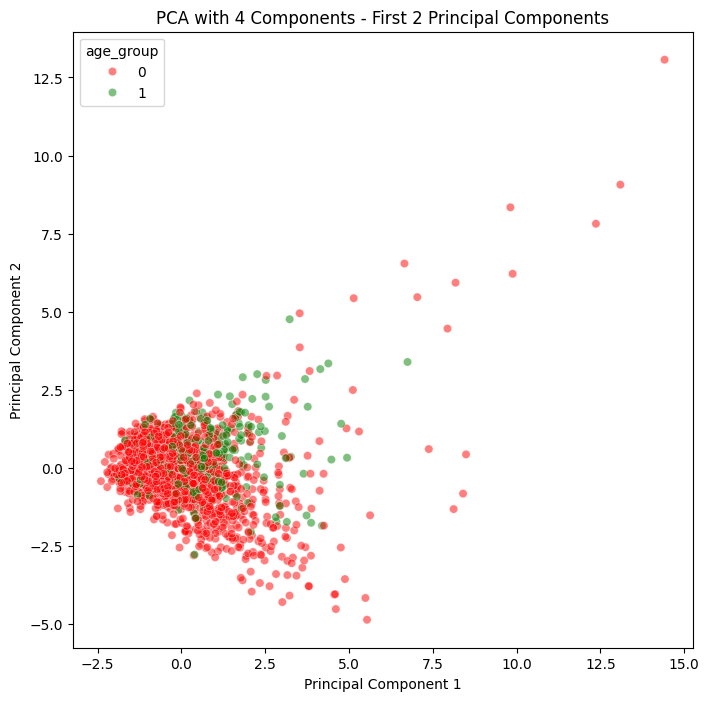

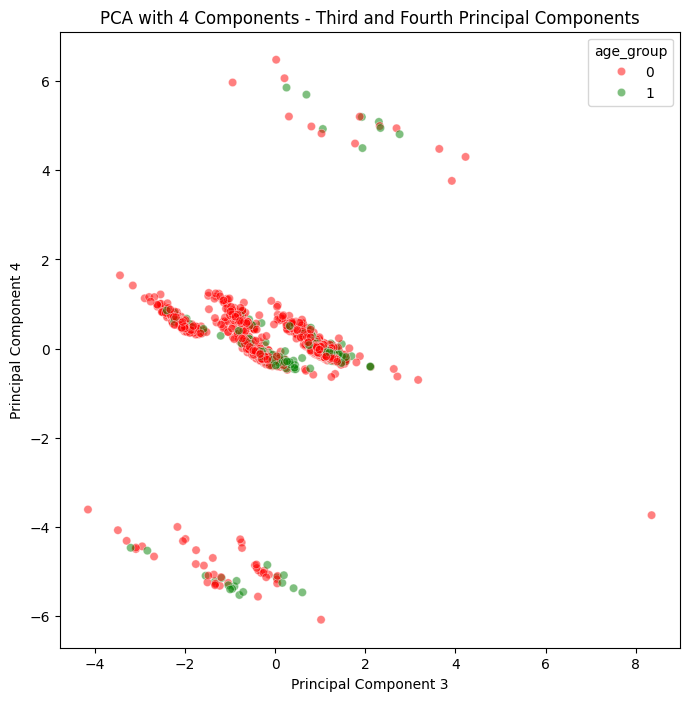

<Figure size 1200x1200 with 0 Axes>

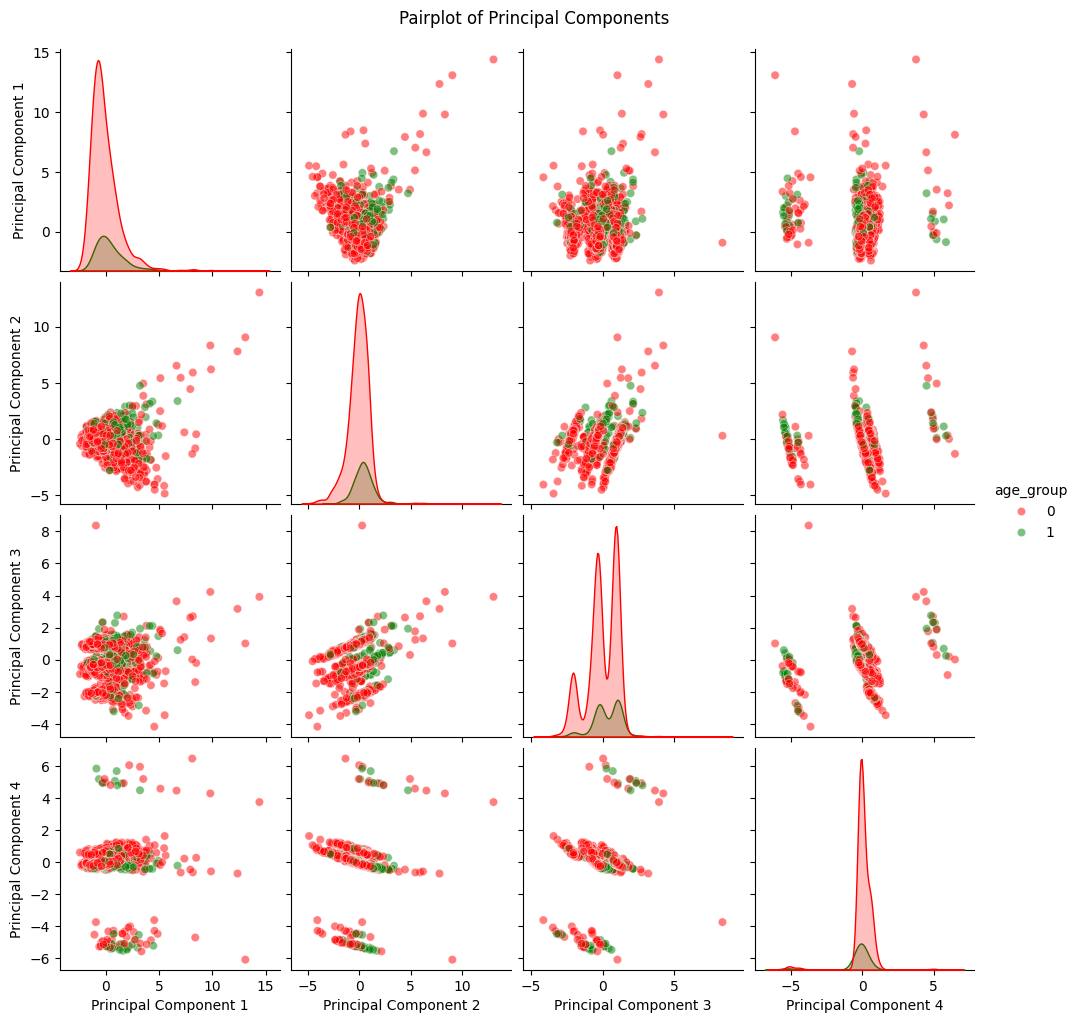

In [110]:
# Perform PCA with 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

print(f'\nPCA Features: Number of samples and attributes: {X_pca.shape}')

# Using train_test_split to create a new split for the PCA reduced input data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42, stratify=y)

# Convert PCA result to DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'])
pca_df = pd.concat([pca_df, df[['age_group']].reset_index(drop=True)], axis=1)

# Visualize the PCA results for the first two components
plt.figure(figsize=(8,8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='age_group', data=pca_df, palette=['r', 'g'], alpha=0.5)
plt.title('PCA with 4 Components - First 2 Principal Components')
plt.show()

# Visualize the PCA results for the third and fourth components
plt.figure(figsize=(8,8))
sns.scatterplot(x='Principal Component 3', y='Principal Component 4', hue='age_group', data=pca_df, palette=['r', 'g'], alpha=0.5)
plt.title('PCA with 4 Components - Third and Fourth Principal Components')
plt.show()

# Visualize all four principal components using pairplot
plt.figure(figsize=(12, 12))
sns.pairplot(pca_df, hue='age_group', palette=['r', 'g'], plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()

The model that performed best after hyperparameter tuning was Random Forest. The Random Forest model is now trained on the PCA-reduced data and the result is reported.

In [115]:
# Creating a grid of the interested hyperparameters and range within which to tune
ht_RF_grid = [{
    'max_leaf_nodes': list(range(4, 257, 4)),  # Generates values from 4 to 256 with a step of 4
    'n_estimators': list(range(25, 275, 25)),  # Generates values from 25 to 250 with a step of 25
    'n_jobs': [-1],  # Number of jobs to run in parallel, using all processors
    'random_state': [42, 84, 126]  # Specified values for random_state
}]


# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_RF = GridSearchCV(estimator = ht_RF, param_grid = ht_RF_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_RF.fit(X_train_pca, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_RF.best_estimator_)
print("Best parameters", gs_RF.best_params_)
gs_RF_score = gs_RF.best_score_
print("Best Cross-validated Classification accuracy", gs_RF_score)

Best estimator RandomForestClassifier(max_leaf_nodes=48, n_estimators=25, n_jobs=-1,
                       random_state=126)
Best parameters {'max_leaf_nodes': 48, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 126}
Best Cross-validated Classification accuracy 0.8407624633431086


### Feature Selection

In [167]:
# Apply SelectPercentile to retain 50% of the highest scoring features
select_percentile = SelectPercentile(score_func=f_classif, percentile=50)
X_train_selected = select_percentile.fit_transform(X_train, y_train)
X_test_selected = select_percentile.transform(X_test)

# Get the selected feature indices
selected_indices = select_percentile.get_support(indices=True)
selected_features = X.columns[selected_indices]

print(f'Selected features ({len(selected_features)}): {selected_features}')

Selected features (3): Index(['PAQ605', 'LBXGLU', 'LBXGLT'], dtype='object')


The model that performed best after hyperparameter tuning was Random Forest. The Random Forest model is now trained on the feature-reduced data and the result is reported.

In [168]:
# Train the RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(max_leaf_nodes=132, n_estimators=100, n_jobs=-1, random_state=42)
best_rf.fit(X_train, y_train)

# Feature selection using the best model
selector = SelectFromModel(best_rf, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train a new RandomForestClassifier on the selected features
final_rf = RandomForestClassifier(max_leaf_nodes=132, n_estimators=100, n_jobs=-1, random_state=42)
final_rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = final_rf.predict(X_test_selected)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Get selected feature indices and their importance
selected_features = selector.get_support(indices=True)
feature_importances = final_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[selected_features],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       479
           1       0.50      0.13      0.21        91

    accuracy                           0.84       570
   macro avg       0.68      0.55      0.56       570
weighted avg       0.80      0.84      0.80       570

Accuracy Score: 0.8403508771929824
Feature Importances:
   Feature  Importance
2  LBXGLT    0.296504
3   LBXIN    0.255235
0  BMXBMI    0.236096
1  LBXGLU    0.212165


## tSNE and Data Visualisation

(1708, 2)


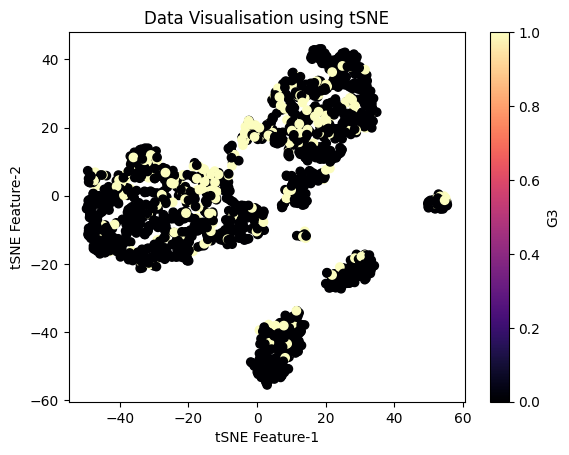

In [170]:
from sklearn.manifold import TSNE
tsne_data = TSNE(n_components=2,init='pca',learning_rate='auto',random_state=42)
X_train_tsne = tsne_data.fit_transform(X_train_std)

print(X_train_tsne.shape)

plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=y_train,cmap='magma')
plt.xlabel("tSNE Feature-1")
plt.ylabel("tSNE Feature-2")
plt.colorbar(label='G3')
plt.title("Data Visualisation using tSNE")
plt.show()


## Results

In [145]:
# Define the results as structured arrays
results = np.array([
    ("SVM - RBF", "SVC(C=10.0, gamma=0.1)", "{'C': 10.0, 'gamma': 0.1}", 0.8477731474335888),
    ("Decision Tree", "DecisionTreeClassifier(max_depth=1, random_state=42)", "{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}", 0.8401656634254258),
    ("Random Forest", "RandomForestClassifier(max_leaf_nodes=132, n_jobs=-1, random_state=42)", "{'max_leaf_nodes': 132, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}", 0.8477765773181734),
    ("AdaBoost", "AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=48), learning_rate=1.6857894736842105, n_estimators=150, random_state=42)", "{'algorithm': 'SAMME.R', 'estimator__max_leaf_nodes': 48, 'learning_rate': 1.6857894736842105, 'n_estimators': 150, 'random_state': 42}", 0.846612131501775),
    ("Gradient Boost", "GradientBoostingClassifier(learning_rate=0.01, max_leaf_nodes=16, n_estimators=250, random_state=42)", "{'learning_rate': 0.01, 'max_leaf_nodes': 16, 'n_estimators': 250, 'random_state': 42}", 0.8448491708254018)
], dtype=[('Model', 'U20'), ('Best Estimator', 'U200'), ('Best Parameters', 'U200'), ('Best Cross-validated Accuracy', float)])

# Print the results in a tabular format
headers = ['Model', 'Best Estimator', 'Best Parameters', 'Best Cross-validated Accuracy']
print("{:<20} | {:<70} | {:<70} | {}".format(*headers))
print("-" * 190)
for result in results:
    print("{:<20} | {:<70} | {:<70} | {:.6f}".format(*result))


Model                | Best Estimator                                                         | Best Parameters                                                        | Best Cross-validated Accuracy
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVM - RBF            | SVC(C=10.0, gamma=0.1)                                                 | {'C': 10.0, 'gamma': 0.1}                                              | 0.847773
Decision Tree        | DecisionTreeClassifier(max_depth=1, random_state=42)                   | {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2} | 0.840166
Random Forest        | RandomForestClassifier(max_leaf_nodes=132, n_jobs=-1, random_state=42) | {'max_leaf_nodes': 132, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42} | 0.847777
AdaBoost             | AdaBoostClassifier(estimator=De

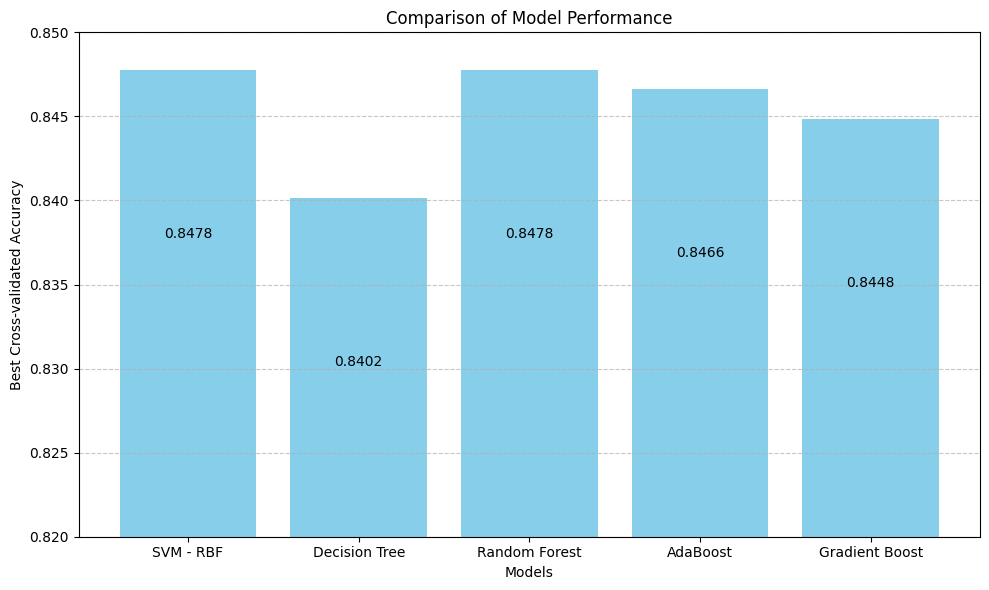

In [146]:
# Define the models and their respective best cross-validated accuracies
models = ['SVM - RBF', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost']
accuracies = np.array([0.8477731474335888, 0.8401656634254258, 0.8477765773181734, 0.846612131501775, 0.8448491708254018])

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')

# Adding the accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{accuracy:.4f}', ha='center', color='black', fontsize=10)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Best Cross-validated Accuracy')
plt.title('Comparison of Model Performance')
plt.ylim(0.82, 0.85)  # Adjust ylim to fit the range of accuracies
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


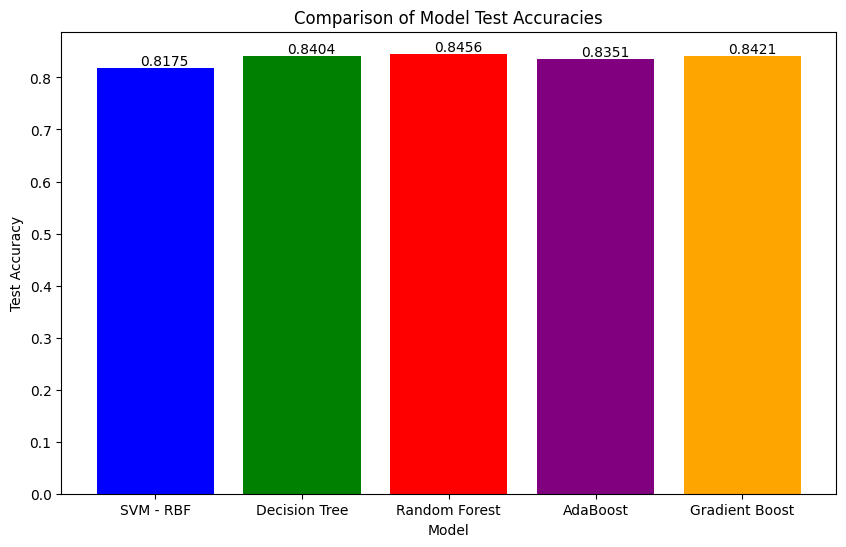

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['SVM - RBF', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost']

# Test accuracies
accuracies = [0.8175, 0.8404, 0.8456, 0.8351, 0.8421]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.005, round(yval, 4))

# Adding titles and labels
plt.title('Comparison of Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

# Display the plot
plt.show()


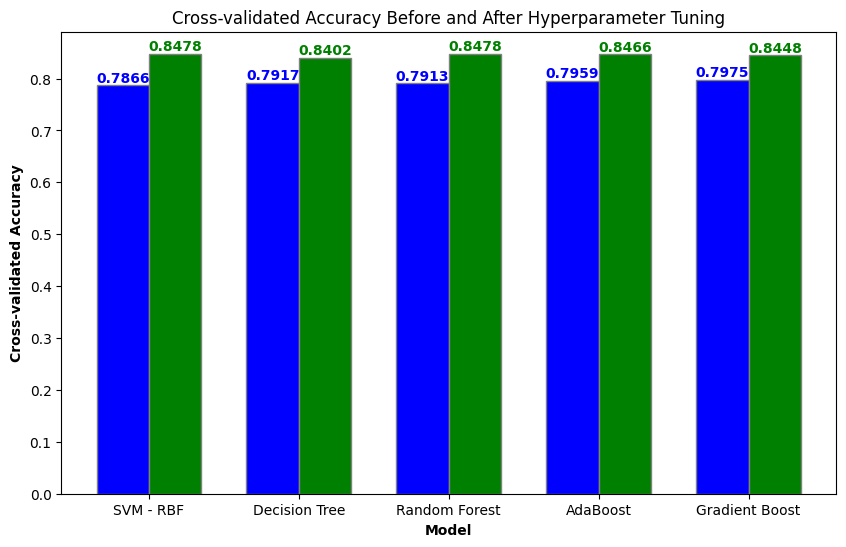

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['SVM - RBF', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost']
before_tuning = [0.78665, 0.7917048942224019, 0.79128, 0.79591, 0.7975]
after_tuning = [0.8477731474335888, 0.8401656634254258, 0.8477765773181734, 0.846612131501775, 0.8448491708254018]

# Bar width
bar_width = 0.35

# Bar positions
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, before_tuning, color='blue', width=bar_width, edgecolor='grey', label='Before Tuning')
bars2 = plt.bar(r2, after_tuning, color='green', width=bar_width, edgecolor='grey', label='After Tuning')

# Adding labels and title
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Cross-validated Accuracy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)
plt.title('Cross-validated Accuracy Before and After Hyperparameter Tuning')

# Adding numbers to the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom', fontweight='bold', color='blue')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom', fontweight='bold', color='green')

# Showing the plot
plt.show()


In [173]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import numpy as np
import pandas as pd

# Assume X_train, X_test, y_train, y_test are defined and contain your data and labels

# Best parameters obtained from hyperparameter tuning
svm_params = {'C': 10.0, 'gamma': 0.1}
dt_params = {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
rf_params = {'max_leaf_nodes': 132, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
ada_params = {'estimator': DecisionTreeClassifier(max_leaf_nodes=48), 'algorithm': 'SAMME.R', 
              'learning_rate': 1.6857894736842105, 'n_estimators': 150, 'random_state': 42}
gb_params = {'learning_rate': 0.01, 'max_leaf_nodes': 16, 'n_estimators': 250, 'random_state': 42}

# Initialize models with best parameters
svm_model = SVC(**svm_params)
dt_model = DecisionTreeClassifier(**dt_params)
rf_model = RandomForestClassifier(**rf_params)
ada_model = AdaBoostClassifier(**ada_params)  # Use 'estimator' instead of 'base_estimator'
gb_model = GradientBoostingClassifier(**gb_params)

# Train each model on X_train and y_train
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Evaluate models on X_test
svm_score = svm_model.score(X_test, y_test)
dt_score = dt_model.score(X_test, y_test)
rf_score = rf_model.score(X_test, y_test)
ada_score = ada_model.score(X_test, y_test)
gb_score = gb_model.score(X_test, y_test)

# Print the accuracy scores
print(f"SVM - RBF Test Accuracy: {svm_score:.4f}")
print(f"Decision Tree Test Accuracy: {dt_score:.4f}")
print(f"Random Forest Test Accuracy: {rf_score:.4f}")
print(f"AdaBoost Test Accuracy: {ada_score:.4f}")
print(f"Gradient Boost Test Accuracy: {gb_score:.4f}")


SVM - RBF Test Accuracy: 0.8175
Decision Tree Test Accuracy: 0.8404
Random Forest Test Accuracy: 0.8456
AdaBoost Test Accuracy: 0.8351
Gradient Boost Test Accuracy: 0.8421
